In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

## Sympy

In [2]:
def curl_sym(Fx, Fy, Fz, x, y, z):
    curl_x = sp.diff(Fz, y) - sp.diff(Fy, z)
    curl_y = sp.diff(Fx, z) - sp.diff(Fz, x)
    curl_z = sp.diff(Fy, x) - sp.diff(Fx, y)
    return curl_x, curl_y, curl_z

In [3]:
x_sym, y_sym, z_sym = sp.symbols('x y z')

# Define 2D velocity field
u_sym = -sp.cos(2*sp.pi*x_sym)*sp.sin(2*sp.pi*y_sym)
v_sym = sp.sin(2*sp.pi*x_sym)*sp.cos(2*sp.pi*y_sym)

u_sym = x_sym**2 + y_sym**2 + sp.sin(2*sp.pi*x_sym)*sp.cos(2*sp.pi*y_sym)
v_sym = x_sym**2 + y_sym**2 + sp.sin(2*sp.pi*x_sym)*sp.cos(2*sp.pi*y_sym)

u_sym = y_sym-0.5
v_sym = -x_sym-0.5

u_sym = x_sym
v_sym = x_sym**2

u_sym, v_sym

In [4]:
omega_sym = curl_sym(u_sym, v_sym, 0, x_sym, y_sym, z_sym)
omega_sym

## Numpy

In [5]:
def curl_numerical(u, v, w, dx):
    """
    Returns the numerical curl of a vector field.
    """
    def _dim(u):
        return len(np.shape(u))
    if _dim(u) != _dim(v):
        raise ValueError('u and v must have the same dimensionality')
    if _dim(u) == 2:
        du_dy, du_dx = np.gradient(u, dx, edge_order=2)
        dv_dy, dv_dx = np.gradient(v, dx, edge_order=2)
        curl_z = dv_dx - du_dy
        return curl_z
    elif _dim(u) == 3:
        du_dy, du_dx, du_dz = np.gradient(u, dx, edge_order=2)
        dv_dy, dv_dx, dv_dz = np.gradient(v, dx, edge_order=2)
        dw_dy, dw_dx, dw_dz = np.gradient(w, dx, edge_order=2)
        curl_x = dw_dy - dv_dz
        curl_y = du_dz - dw_dx
        curl_z = dv_dx - du_dy
        return curl_x, curl_y, curl_z
    else:
        raise ValueError('Invalid dimensionality')

Text(0.5, 1.0, 'Velocity magnitude')

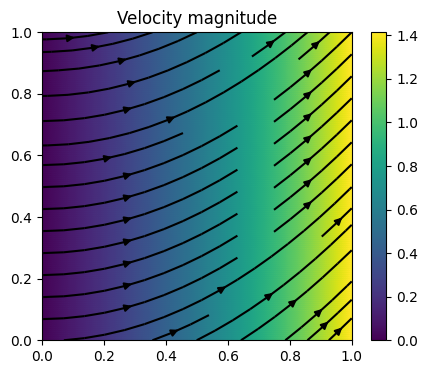

In [6]:
# Define 2D velocity field
_x = np.linspace(0, 1, 150)
dx = _x[1] - _x[0]
x, y = np.meshgrid(_x, _x)
u_func = sp.lambdify((x_sym, y_sym), u_sym)
v_func = sp.lambdify((x_sym, y_sym), v_sym)
u = u_func(x, y)
v = v_func(x, y)
vmag = np.sqrt(u**2 + v**2)

# Plot velocity magnitude
plt.figure(figsize=(5, 4))
plt.scatter(x, y, c=vmag, cmap='viridis')
plt.colorbar()
plt.streamplot(x, y, u, v, color='k', density=0.5)
plt.title('Velocity magnitude')

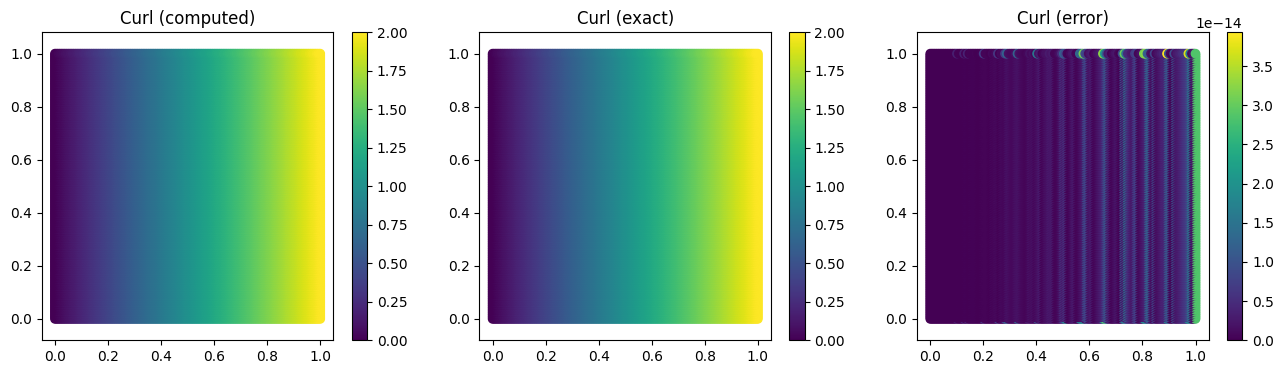

In [7]:
omega = curl_numerical(u, v, dx)
# Plot curl
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(x, y, c=omega, cmap='viridis')
plt.colorbar()
plt.title('Curl (computed)')
plt.axis('equal')

plt.subplot(1, 3, 2)
omega_exact_func = sp.lambdify((x_sym, y_sym), sp.diff(v_sym, x_sym) - sp.diff(u_sym, y_sym))
omega_exact = omega_exact_func(x, y)
if isinstance(omega_exact, int) or isinstance(omega_exact, float):
    omega_exact = np.ones_like(omega) * omega_exact
plt.scatter(x, y, c=omega_exact, cmap='viridis')
plt.colorbar()
plt.title('Curl (exact)')
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.scatter(x, y, c=np.abs(omega - omega_exact), cmap='viridis')
plt.colorbar()
plt.title('Curl (error)')
plt.axis('equal')
